In [31]:
import torch
from msc_project.circuits_custom.custom_stepmlp import GACompatibleStepMLP 
from circuits.examples.keccak import Keccak
from circuits.utils.format import format_msg
from msc_project.utils.model_utils import get_mlp_layers, process_mlp_layers, unfold_stepmlp_parameters
import matplotlib.pyplot as plt

In [4]:
model_path = "../results/genetic_algorithm_experiments/successful_experiment_abs_fitness_func/ga_optimised_stepml_model.pth"

In [5]:
mlp_state_dict = torch.load(model_path)

In [25]:
keccak = Keccak(c=20, log_w=1, n=3)
trigger_bits = format_msg("Test", keccak.msg_len)
payload_bits = format_msg("tseT", keccak.d)

mlp = GACompatibleStepMLP.create_with_backdoor(
    trigger=trigger_bits.bitlist, payload=payload_bits.bitlist, k=keccak
)

In [30]:
weights, biases = unfold_stepmlp_parameters(mlp)

(array([0.00336928, 0.        , 0.01010785, 0.00336928, 0.02358499,
        0.02695427, 0.03032355, 0.0202157 , 0.02695427, 0.02695427,
        0.05390854, 0.05727782, 0.03706212, 0.03706212, 0.0606471 ,
        0.0404314 , 0.02358499, 0.08086281, 0.0202157 , 0.05390854,
        0.06738567, 0.04716997, 0.0606471 , 0.04716997, 0.05390854,
        0.05727782, 0.06738567, 0.05053925, 0.03369284, 0.0606471 ,
        0.03369284, 0.05390854, 0.08086281, 0.04380069, 0.0404314 ,
        0.06738567, 0.03706212, 0.0606471 , 0.0606471 , 0.05727782,
        0.06738567, 0.04716997, 0.07749352, 0.05390854, 0.05390854,
        0.03032355, 0.06738567, 0.0404314 , 0.07412424, 0.04716997,
        0.05727782, 0.02695427, 0.03706212, 0.04380069, 0.05053925,
        0.05390854, 0.04716997, 0.05727782, 0.05727782, 0.04716997,
        0.06738567, 0.08423209, 0.05390854, 0.05727782, 0.07412424,
        0.07075496, 0.10781708, 0.08760137, 0.09433994, 0.10107851,
        0.10781708, 0.15835633, 0.23248057, 0.23

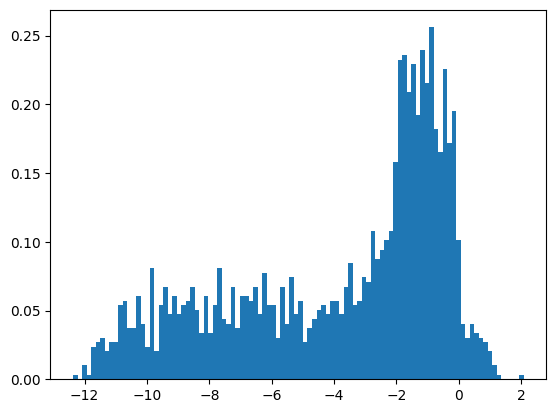

In [33]:
plt.hist(biases, bins=100, density=True)

In [28]:
payload_bits.bitstr

'0111010001'